In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-full.csv', sep= ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Description
- Age : Age of the customer - Integer value
- job : Job of the customer - Categorical feature
- marital : Marital status of the customer- Categorical feature
- education : eduction status - categorical feature
- default : whether the custome is defaulter or not - categorical feature
- balance : yearly account balance of the customer - continueous feature
- housing : housing status of the customer - categorical feature
- loan : whether the customer availed any loans - categorical feature
- contact : how many times the customer has been contacted - categorical feature
- day : day from last contact - discrete feature
- month : month from last contacted date - categorical feature.
- duration : duration of last contact in hours - contineous feature
- campaign : contact with how many campaign - categorical feature
- pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
- y : has the client subscribed a term deposit? (binary: 'yes','no')



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Data cleansing

In [4]:
# check missing value
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Exploration Data Analysis

### Feature Engineering 1

In [6]:
# feature engineering for predictor
df['y']=df['y'].map({'yes':1,'no':0})
df['default']=df['default'].map({'yes':1,'no':0})
df['housing']=df['housing'].map({'yes':1,'no':0})
df['loan']=df['loan'].map({'yes':1,'no':0})# melakukan penginisialisasian terhadap variable predictor
df = df[df['pdays'] > -1]  # mengambil data diatas -1 karna  pdays -1 belum pernah dikontak sebelumnya

In [7]:
df_numerik = df.select_dtypes(include=['float64','int64'])
df_numerik.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
24060,33,0,882,0,0,21,39,1,151,3,0
24062,42,0,-247,1,1,21,519,1,166,1,1
24064,33,0,3444,1,0,21,144,1,91,4,1
24072,36,0,2415,1,0,22,73,1,86,4,0
24077,36,0,0,1,0,23,140,1,143,3,1


findfont: Font family ['San'] not found. Falling back to DejaVu Sans.


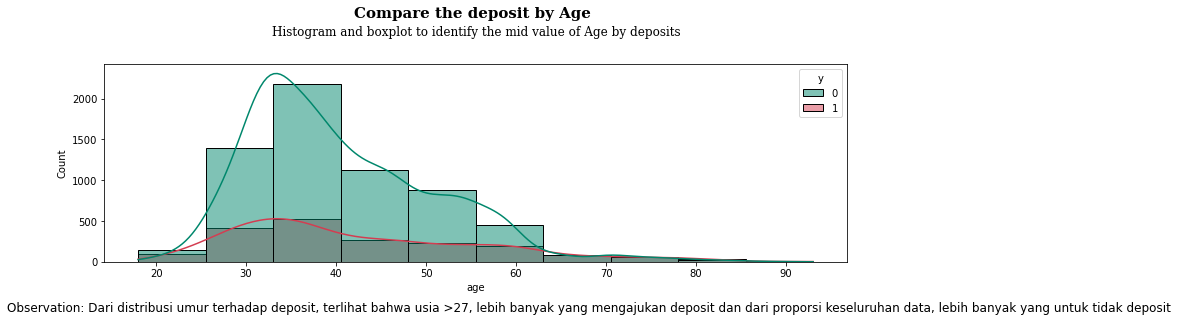

In [8]:
palette =  ['#A7D2CB','#C98474','#874C62','#7FB77E','#F7F6DC', '#FFC090']
fig=plt.figure(figsize=(18,8), edgecolor='black')
plt.suptitle("Compare the deposit by Age", family='Serif', size=15,weight='bold',ha='right')

plt.figtext(0.57,0.93,"Histogram and boxplot to identify the mid value of Age by deposits", family='Serif', size=12, ha='right')
gs = GridSpec(nrows=2, ncols=4, figure=fig)
ax1=plt.subplot(gs[0,:3])
plt.figtext(0.05,0.45,"Observation: Dari distribusi umur terhadap deposit, terlihat bahwa usia >27, lebih banyak yang mengajukan deposit dan dari proporsi keseluruhan data, lebih banyak yang untuk tidak deposit",
           family='San', size=12, ha='left')
sns.histplot(data=df, x='age', bins=10, ax=ax1, kde=True, hue='y', multiple='layer', element='bars', palette=['#00876c','#d43d51']);

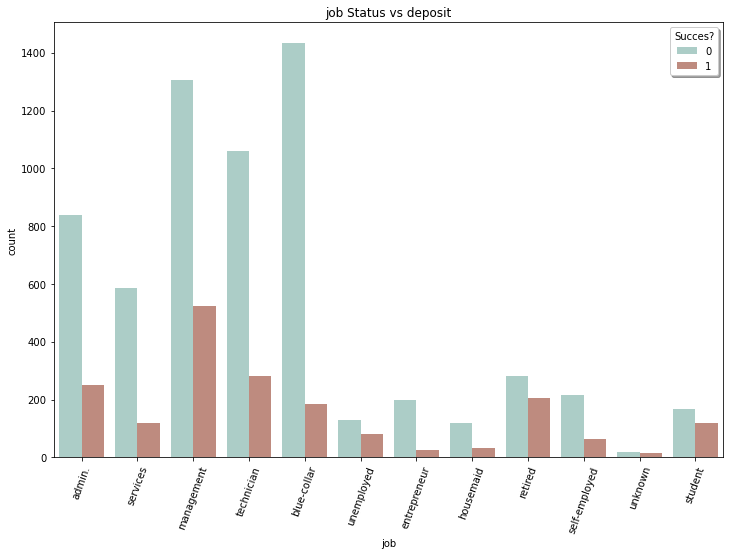

In [9]:
fig = plt.figure(figsize=(12,8))
plt.title('job Status vs deposit')
g = sns.countplot(x= 'job', hue = 'y', data=df, palette=palette);
plt.xticks(rotation=70)
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
plt.show()

Dari distribusi pekerjaan terhadap deposit, terlihat bahwa blue colar yang tertinggi dalam menolak deposit, dan management lah yang tertinggi dalam mengajukan depoit

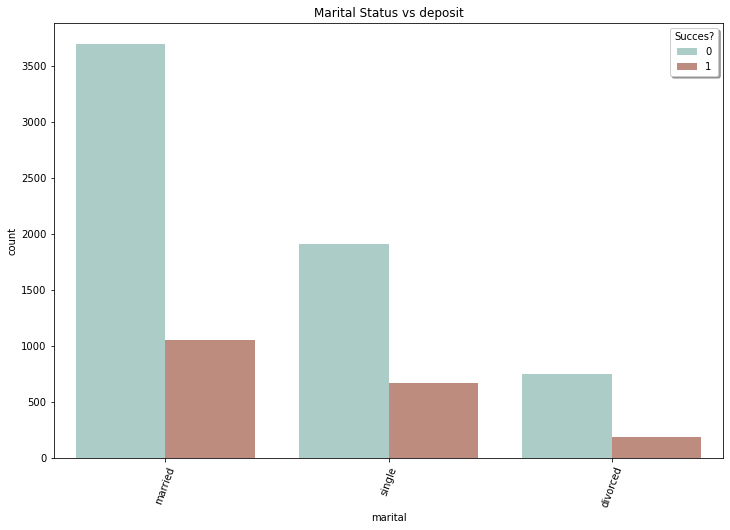

In [10]:
fig = plt.figure(figsize=(12,8))
plt.title('Marital Status vs deposit')
g = sns.countplot(x= 'marital', hue = 'y', data=df, palette=palette);
plt.xticks(rotation=70)
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
plt.show()

Dari distribusi status terhadap pekerjaan, terlihat bahwa yang sudah menikah lah yang tertinggi dalam menolak deposit, dan yang sudah menikah juga lah yang tertinggi dalam mengajukan depoit

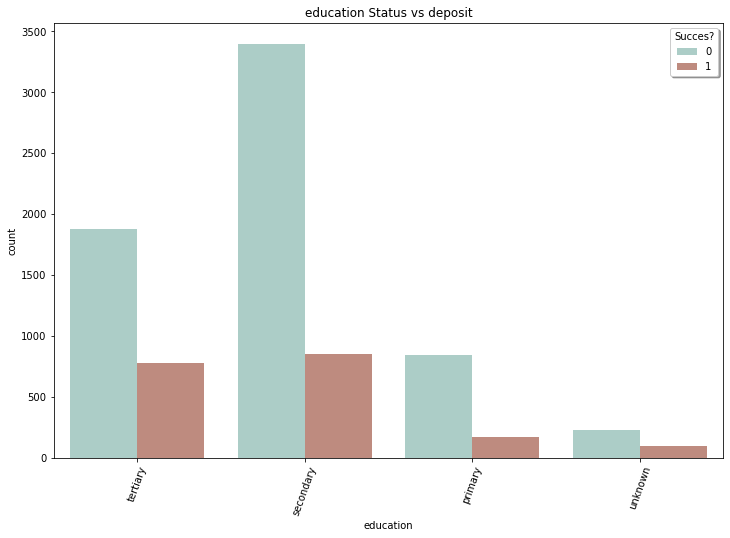

In [11]:
fig = plt.figure(figsize=(12,8))
plt.title('education Status vs deposit')
g = sns.countplot(x= 'education', hue = 'y', data=df, palette=palette);
plt.xticks(rotation=70)
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
plt.show()

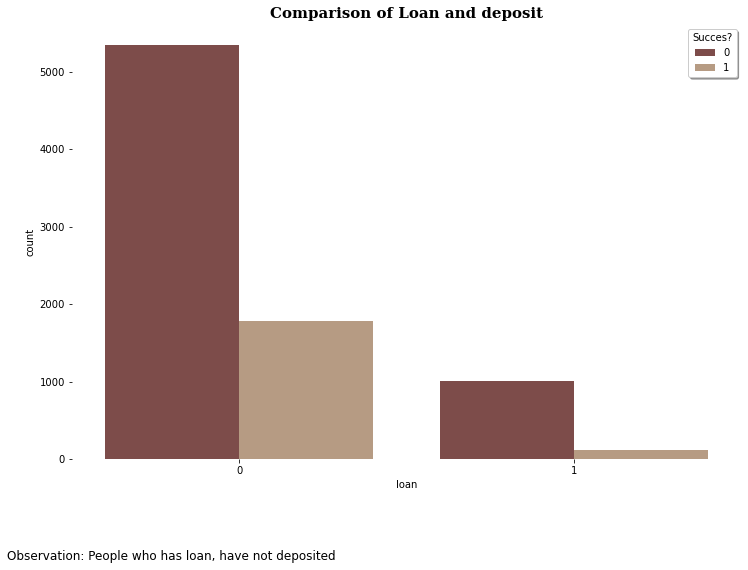

In [12]:
fig = plt.figure(figsize=(12,8))
ax=sns.countplot(data=df, x='loan', hue='y', palette=['#854442','#be9b7b'])
ax.set_title('Comparison of Loan and deposit', font='Serif', weight='bold', size=15)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
plt.figtext(0.05,-0.05,"Observation: People who has loan, have not deposited",
           family='San', size=12, ha='left');

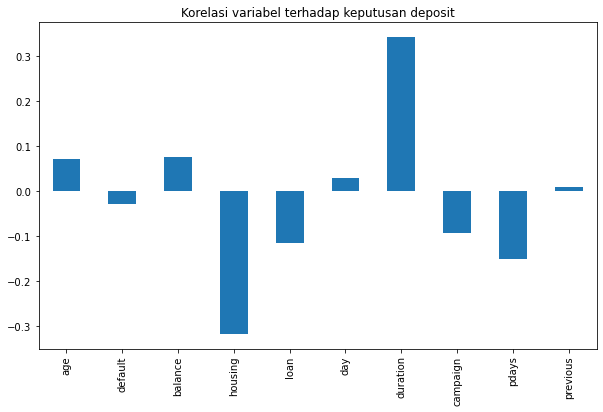

In [13]:
# Membuat correlation bar(mencari korelasi antara variable dependent dengan semua variable independent) plot dan correlation matrix(mencari korelasi antar variable independent)
fig,ax = plt.subplots(figsize=(10,6))
korelasi = df_numerik.drop(columns=['y'], inplace=False).corrwith(df_numerik.y)
korelasi.plot.bar(title='Korelasi variabel terhadap keputusan deposit');

dari korelasi barplot diatas variable yang berpengaruh tinggi terhadap prediktor namun positive dapat terlihat pada variable durasi, dan yang berkorelasi namun negative ada pada pdays atau interval waktu dalam jumlah hari dari client di telfon terakhir kali.

<AxesSubplot:>

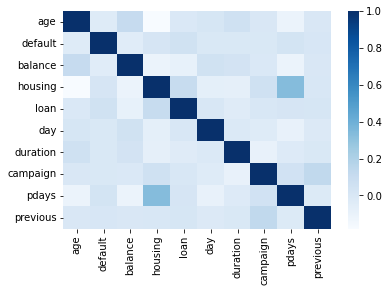

In [14]:
# cek korelasi antar variable independent
matriks_korelasi = df_numerik.drop(columns=['y'], inplace=False).corr()
sns.heatmap(matriks_korelasi, cmap='Blues')

dari pearson korelation diatas dapat terlihat bahwa tidak ada yang berkorelasi tinggi antar variable independent, jadi kita tidak perlu men takeout variable tertentu.

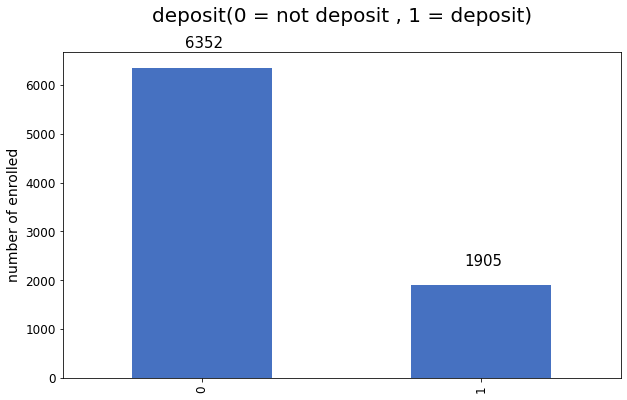

In [15]:
# enrolled distribution
ax = df['y'].value_counts().plot(kind='bar', figsize=(10,6), fontsize = 12, color='#4671C1')
ax.set_title('deposit(0 = not deposit , 1 = deposit)', size=20, pad=30)
ax.set_ylabel('number of enrolled', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 400, str(round(i.get_height(), 2)), fontsize=15)

proporsi data deposit (y) cukup imbalance, perbandingan balance dan imbalance itu juga sangat subjective, bisa 1:2 atau 1:3, dan menurut saya ini sudah cukup imbalance, maka data prediktor akan dilakukan perlakuan khusus, yaitu dibuat balance dengan cara tertentu.

### Feature Engineering 2

In [16]:
df.drop(columns = ['month'], inplace=True)
df = pd.get_dummies(df)

In [17]:
# Mendefinisikan var dependen
y = np.array(df['y'])
# Menghilangkan beberapa kolom yang redundan
df.drop(columns = ['y'], inplace=True)

In [18]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
24060,33,0,882,0,0,21,39,1,151,3,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
24062,42,0,-247,1,1,21,519,1,166,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
24064,33,0,3444,1,0,21,144,1,91,4,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
24072,36,0,2415,1,0,22,73,1,86,4,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
24077,36,0,0,1,0,23,140,1,143,3,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,0,1475,1,0,16,1166,3,530,12,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
45201,53,0,583,0,0,17,226,1,184,4,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
45204,73,0,2850,0,0,17,300,1,40,8,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


# Modeling
- Logistic Regression
- K-Nearest Neighbors
- Suport Vector Machine
- Decision Tree
- Random Forest
- Naive Bayes

In [19]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size = 0.2, random_state = 42 , stratify=y)

In [20]:
# Merubah X_train dan X_test menjadi numpy array (test set sudah berbentuk array ajdi tidak perlu)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [22]:
X_train

array([[   38,     0, 11971, ...,     0,     0,     0],
       [   32,     1,  -575, ...,     0,     0,     0],
       [   29,     0,    25, ...,     0,     0,     0],
       ...,
       [   32,     0,   138, ...,     1,     0,     0],
       [   54,     0,   140, ...,     0,     0,     0],
       [   31,     0,     4, ...,     1,     0,     0]], dtype=int64)

In [23]:
# Preprocessing Standardization (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Logistic Regresion

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Train The model
model_lr = LogisticRegression(solver="liblinear", random_state = 42, penalty = 'l1')
%time model_lr.fit(X_train, y_train)
# Predict model DecissionTree and summary statistic
%time lr_test_predict = model_lr.predict(X_test)
cm = confusion_matrix(y_test, lr_test_predict)
print(classification_report(y_test, lr_test_predict))
print(cm)

Wall time: 175 ms
Wall time: 0 ns
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1271
           1       0.73      0.57      0.64       381

    accuracy                           0.85      1652
   macro avg       0.81      0.76      0.78      1652
weighted avg       0.85      0.85      0.85      1652

[[1191   80]
 [ 162  219]]


## K-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', metric='minkowski',n_jobs=-2)
%time model_knn.fit(X_train, y_train)
# Predict model SVC gaussian and summary statistic
%time knn_test_predict = model_knn.predict(X_test)
cm = confusion_matrix(y_test, knn_test_predict)
print(classification_report(y_test, knn_test_predict))
print(cm)

Wall time: 0 ns
Wall time: 290 ms
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1271
           1       0.66      0.51      0.58       381

    accuracy                           0.83      1652
   macro avg       0.76      0.72      0.73      1652
weighted avg       0.82      0.83      0.82      1652

[[1172   99]
 [ 187  194]]


## Suport Vector Machine

In [26]:
from sklearn.svm import SVC
# Train The model
model_svc = SVC(kernel="poly", random_state = 42, C=0.1, probability=True)
%time model_svc.fit(X_train, y_train)
# Predict model SVC gaussian and summary statistic
%time svc_test_predict = model_svc.predict(X_test)
cm = confusion_matrix(y_test, svc_test_predict)
print(classification_report(y_test, svc_test_predict))
print(cm)

Wall time: 3.42 s
Wall time: 100 ms
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1271
           1       0.76      0.28      0.41       381

    accuracy                           0.81      1652
   macro avg       0.79      0.63      0.65      1652
weighted avg       0.81      0.81      0.78      1652

[[1237   34]
 [ 273  108]]


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
# Train The model
model_dt = DecisionTreeClassifier(criterion ="gini", max_depth = 10, random_state = 42)
%time model_dt.fit(X_train, y_train)
# Predict model DecissionTree and summary statistic
%time dt_test_predict = model_dt.predict(X_test)
cm = confusion_matrix(y_test, dt_test_predict)
print(classification_report(y_test, dt_test_predict))
print(cm)

Wall time: 27.1 ms
Wall time: 998 µs
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1271
           1       0.65      0.53      0.58       381

    accuracy                           0.82      1652
   macro avg       0.76      0.72      0.74      1652
weighted avg       0.82      0.82      0.82      1652

[[1160  111]
 [ 179  202]]


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
# Train The model
model_rf = RandomForestClassifier(criterion ="gini", max_depth = 10, n_estimators = 101, random_state = 42)
%time model_rf.fit(X_train, y_train)
# Predict model RandomForest and summary statistic
%time rf_test_predict = model_rf.predict(X_test)
cmr = confusion_matrix(y_test, rf_test_predict)
print(classification_report(y_test, rf_test_predict))
print(cm)

Wall time: 364 ms
Wall time: 11.1 ms
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1271
           1       0.76      0.52      0.62       381

    accuracy                           0.85      1652
   macro avg       0.81      0.74      0.76      1652
weighted avg       0.84      0.85      0.84      1652

[[1191  162]
 [  80  219]]


## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
%time model_nb.fit(X_train, y_train)
# Predict model RandomForest and summary statistic
%time nb_test_predict = model_nb.predict(X_test)
cm = confusion_matrix(y_test, nb_test_predict)
print(classification_report(y_test, nb_test_predict))
print(cm)

Wall time: 4 ms
Wall time: 1 ms
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1271
           1       0.51      0.66      0.57       381

    accuracy                           0.78      1652
   macro avg       0.70      0.73      0.71      1652
weighted avg       0.80      0.78      0.78      1652

[[1032  239]
 [ 131  250]]


# ROC AUC Curve

In [30]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)

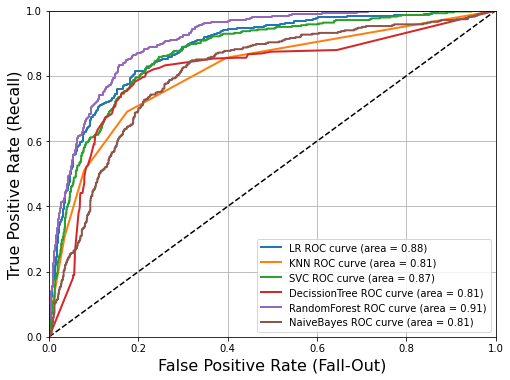

In [33]:
from sklearn.metrics import roc_curve,auc
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                   
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                           
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=["LR",'KNN','SVC','DecissionTree', 'RandomForest','NaiveBayes']
for idx,model in enumerate([model_lr,model_knn,model_svc,model_dt,model_rf,model_nb]):
    y_scores=model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

Disini sudah jelas bahwa model RandomForest lebih unggul, karna nilai TPR nya mendekati angka 1 yang dimana model cukup baik dalam hal memprediksi, tapi apakah model RandomForest ini akan lebih baik jika dilakukan HyperParameter Tuning?, pada langkah selanjutnya saya akan melakukan nya melakukan evaluasi model menggunakan cofusion matrix pada model random forest.

In [44]:
from sklearn.metrics import accuracy_score
rf_best_random = model_lr
y_pred_rf = rf_best_random.predict(X_test)
cmr = confusion_matrix(y_pred_rf,y_test)
print(classification_report(y_pred_rf,y_test))
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1353
           1       0.57      0.73      0.64       299

    accuracy                           0.85      1652
   macro avg       0.76      0.81      0.78      1652
weighted avg       0.87      0.85      0.86      1652

[[1191  162]
 [  80  219]]


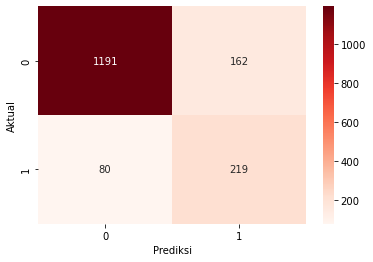

In [45]:
# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cmr, columns = np.unique(y_test),
                        index = np.unique(y_test))

cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g');

dari confusion matrix pada data test dapat disimpulkan bahwa 0 dan terprediksi 0 sangat banyak artinya data tersebut memang imbalance, dan mesti diperlakukan khusus untuk balancing, dan yang aktual nya 1 atau deposit dan terprediksi deposit terdapat 219 dari 299 data y_test (1).